In [5]:
import os
import tiktoken
import numpy as np
from dotenv import load_dotenv
import streamlit as st
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain.load import dumps, loads
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
model = ChatOpenAI(model="gpt-4o-mini", api_key=OPENAI_API_KEY)

data_directory = "/Users/taha/Desktop/rag/data"

In [3]:
# Özetleme zincirini oluşturma
def create_summary(doc_content):
    summary_template = ChatPromptTemplate.from_template(
        "Summarize the following document in German in a way that captures its semantic meaning most accurately.\n\n{doc}"
    )
    chain = summary_template | model | StrOutputParser()
    return chain.invoke({"doc": doc_content})

# Ana klasörün yolu (data klasörünün yolu)
data_directory = 'data'

# BURASI HER APP CALISTIGINDA TEKRARDAN SUMMARY OLSUTURUYOR
# CÜNKÜ KOMPLE PY DOSYASINI YÜKLÜYOR VE CALISTIRIYOR.
# SADECE SUMMARY YAPTIRMAK ISTEDIGINDE CALISTIR.

def summarize(data_directory): 
# data klasörü altındaki her bir ana klasör için işlem yapıyoruz
    for root, dirs, files in os.walk(data_directory):
        # root sadece bir üst seviyedeki dizini verir, bu yüzden sadece root içindeki ana klasörlerde işlemi yaparız
        if root == data_directory:
            for folder in dirs:
                folder_path = os.path.join(data_directory, folder)
                
                # _summary.txt dosyasını bu ana klasör içinde oluşturuyoruz (alfabetik olarak en üstte olacak şekilde)
                summary_file_path = os.path.join(folder_path, '_summary.txt')
                
                with open(summary_file_path, 'w') as summary_file:
                    # Bu klasörün altındaki tüm dosyaları listelemek için tekrar os.walk kullanıyoruz
                    for sub_root, sub_dirs, sub_files in os.walk(folder_path):
                        for file_name in sub_files:
                            if file_name != '_summary.txt' and file_name.endswith('.txt'):
                                # Her txt dosyasının tam yolunu alıyoruz
                                file_path = os.path.join(sub_root, file_name)
                                
                                # Dosyanın içeriğini okuyoruz
                                with open(file_path, 'r', encoding='utf-8') as txt_file:
                                    content = txt_file.read()
                                
                                # LangChain chain yapısını kullanarak belgeyi özetliyoruz
                                summary = create_summary(content)
                                
                                # Dosya yolunu ve özetini _summary.txt dosyasına yazıyoruz
                                summary_file.write(f"\n=== Chunk ===\n[File path: {file_path}\nFile summary: {summary}]\n")
                
                print(f"{folder} klasörüne _summary.txt dosyası yazıldı.")

---TRANSFORM QUERY---

Modified question:  MagentaTV nedir ve ne gibi özellikler sunar?
---ROUTE QUESTION---
---ROUTE QUESTION TO RAG---
"Node 'transform_query':"
'\n---\n'
---RETRIEVE---
Total embeddings calculated: 395
Total documents created: 395


/Users/taha/Desktop/rag/indexing.py:98: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use invoke instead.
  results = summary_retriever.get_relevant_documents(question)


Iteration 1, results found: 20
Number of unique results retrieved: 20
Successfully loaded document from: data/TV/https___www.telekom.de_magenta-tv.txt
Successfully loaded document from: data/TV/https___www.telekom.de_magenta-tv_tarife-und-optionen_magenta-tv-mit-app.txt
Successfully loaded document from: data/TV/https___www.telekom.de_magenta-tv_online-tv.txt
Successfully loaded document from: data/TV/youtube_Telekom hilft News： Dein Wechsel zu MagentaTV - einfach erklärt.txt
Successfully loaded document from: data/TV/https___www.telekom.de_magenta-tv_tarife-und-optionen_magenta-tv-mit-app_the-handmaids-tale.txt
Successfully loaded document from: data/TV/pdf_kurzbedienungsanleitung-magenta-tv-box.txt
Successfully loaded document from: data/TV/https___www.telekom.de_unterhaltung_serien-und-filme.txt
Successfully loaded document from: data/TV/https___www.telekom.de_hilfe_geraete-zubehoer_magenta-tv-geraete_magenta-tv-one_streaming.txt
Successfully loaded document from: data/TV/https___ww

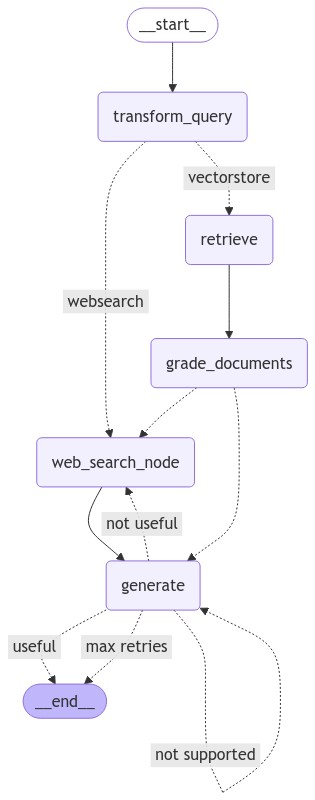

"MagentaTV, Telekom'un sunduğu bir televizyon ve yayın platformudur. Bu platform, mükemmel HD kalitesinde 180'den fazla TV kanalı sunmaktadır. Ayrıca, MagentaTV+ ve RTL+ Premium'daki özel film ve dizilere erişim imkanı sağlar. Kullanıcılar, Netflix ve Disney+ gibi popüler yayın hizmetlerine de erişim sağlayarak geniş bir içerik yelpazesi sunar. Farklı tarifeler ve ek özelliklerle kullanıcılarına çeşitli seçenekler sunarak televizyon deneyimlerini kişiselleştirmelerine olanak tanır. \n\nMagentaTV, kullanıcılarına zaman kaybetmeden izleme, kayıt yapma ve içerik arama gibi birçok özellik sunar. Özellikle, kişisel hızlı erişim çubuğu, bulut kayıt ve sesli asistan gibi işlevler sayesinde televizyon izleme deneyimini daha da zenginleştirir."

In [1]:
import graph
graph.run_graph("MagentaTV nedir?")